# Part 1 Data Exploration
BY: EMEM ASUQUO

## Introduction
The Ford GoBike System Data is a dataset which includes information about individual rides made in a bike-sharing system covering the greater San-Francisco Bay area. 

## Preliminary Wrangling

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [139]:
# Lets load the Dataset into Pandas dataframe
bike_df = pd.read_csv(r'/Users/emmanuelokon/Downloads/201902-fordgobike-tripdata (1).csv')
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [140]:
bike_df.shape

(183412, 16)

## The Structure of the dataset 
The dataset consists of 183,412 rows and 16 columns.

In [141]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

## Data Cleaning 
1. Change the data type of start_time and end_time to DateTime datatype.
2. Change the datatype of bike_share_for_all_trip to boolean.
3. Create new columns (Start_hour, start_day, start_month) from start_time.
4. Change Duration_sec to minutes.

In [142]:
bike_df1=bike_df.copy()

In [143]:
# Checking for duplicates
sum(bike_df1.duplicated())

0

In [144]:
# Change the datatype of start_time and end_time to DateTime datatype
bike_df1.start_time=pd.to_datetime(bike_df1.start_time)
bike_df1.end_time=pd.to_datetime(bike_df1.end_time)

In [145]:
# Change the datatype of bike_share_for_all_trip to boolean.
bike_df1.bike_share_for_all_trip=(bike_df1.bike_share_for_all_trip =='Yes')

In [146]:
# Test the Data cleaning
bike_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [147]:
# Create new columns (Start_hour, start_day, start_month) from start_time.
bike_df1['start_hour']=bike_df1.start_time.dt.hour
bike_df1['start_day']=bike_df1.start_time.dt.weekday
bike_df1['start_month']=bike_df1.start_time.dt.month

In [148]:
# Test
bike_df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False,17,3,2
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,False,18,3,2
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False,12,3,2
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False,17,3,2
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True,23,3,2


In [149]:
# Change Duration_sec to minutes.
bike_df1['duration_minutes']=bike_df1['duration_sec']/60
#Test
bike_df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,start_month,duration_minutes
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False,17,3,2,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,False,18,3,2,708.683333
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False,12,3,2,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False,17,3,2,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True,23,3,2,26.416667


In [150]:
bike_df1.to_csv('bike_df1.csv', index = False)

In [151]:
bike_df1.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_hour,start_day,start_month,duration_minutes
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,183412.000000,183412.0,183412.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,13.458421,2.632178,2.0,12.101307
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,4.724978,1.814786,0.0,29.906496
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000,0.000000,2.0,1.016667
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,9.000000,1.000000,2.0,5.416667
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,14.000000,3.000000,2.0,8.566667
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,17.000000,4.000000,2.0,13.266667
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000,6.000000,2.0,1424.066667


From the descriptive statistics above, the average bike duration  is 726 sec or 12 minutes, 

## What is/are the main feature(s) of interest in your dataset?
The main feature of interest is the trip duration (duration_minutes). I would like to check if gender, age can determine average trip duration. 

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?
User_type shows the number of different users and duration_minutes shows how long the trip was for.

## Univariate Analysis
Lets look at the distribution of our main feature of interest (duration). 

In [152]:
bins = np.arange(0, 3600,60)
def histplot_function(data, x, bins):
    plt.hist(data = bike_df1, x ='duration_sec', bins = bins)
    plt.title("Trip duration in seconds")
    plt.xlabel("Duration in seconds")
    plt.ylabel("Number of trips");

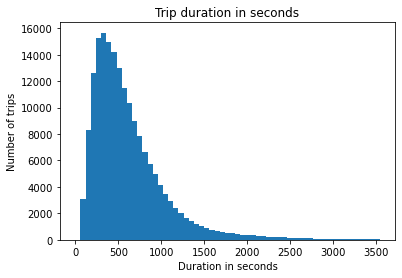

In [153]:
histplot_function(data = bike_df1, x ='duration_sec', bins = bins)

The above chart shows that most of the trip are around 500 seconds, then the rides decreases. This shows that there is a negative correlation between trip duration and number of trips.

In [154]:
# A histogram to show the bike trip duration in minutes
def hisplot_function(data, x, bins):
    binsize = 15
    bins = np.arange(0, bike_df1['duration_minutes'].max()+binsize, binsize)

    plt.figure(figsize=[11.69, 8.27])
    plt.hist(data = bike_df1, x = 'duration_minutes', bins=bins)
    plt.title('Distribution of trip duration in minutes')
    plt.xlabel('Duration in minutes')
    plt.ylabel('Number of Trips')
    plt.show()

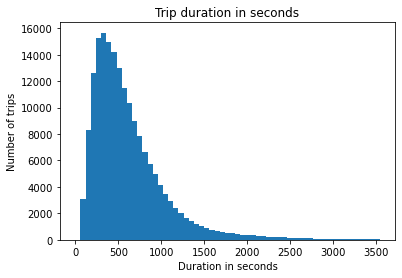

In [155]:
histplot_function(data = bike_df1, x = 'duration_minutes', bins=bins)

From the chart above, it can be seen that the highest number of trips is between 0 to 200 minutes.

In [156]:
def hisplot_function(data, x, bins):
    log_bin_size = 0.15
    log_bins = 15 ** np.arange(0.0, np.log10(bike_df1['duration_minutes'].max())+log_bin_size, log_bin_size)

    plt.figure(figsize=[20.69, 8.27])
    plt.hist(data = bike_df1, x = 'duration_minutes', bins=log_bins)
    plt.title('Distribution of trip duration in minutes')
    plt.xlabel('Duration in minutes')
    plt.ylabel('Number of Trips')
    plt.xscale('log')
    tick_locs=[1,2,5,10,15,20,30,40,50,100,200,500,600,800,1000]
    plt.xticks(tick_locs, tick_locs)
    plt.show()

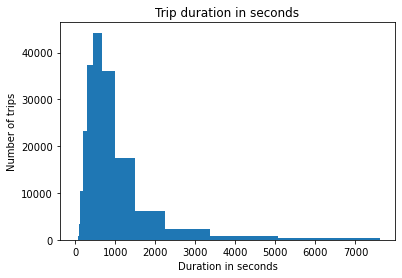

In [157]:
histplot_function(data = bike_df1, x = 'duration_minutes', bins=log_bins)

In [158]:
bike_df1.duration_minutes.describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_minutes, dtype: float64

Using log-scale to plot the previous graph shows that the distribution has a peak between 8 and 15 which means that most of the bike trip takes between 5 and 15. From the analysis, the average bike trip duration was 12 minutes. 

In [159]:
# To calculate the Age from the member_birth_year column.
#code
bike_df1['member_age']=2019-bike_df['member_birth_year']
#Test
bike_df1.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,start_month,duration_minutes,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,False,17,3,2,869.750000,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,False,18,3,2,708.683333,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,False,12,3,2,1030.900000,47.0


In [160]:
# Lets look at the Age distribution of members.
#code
def histplot_function(data, x, bins):
    binsize = 1
    bins = np.arange(0, bike_df1['member_age'].max()+binsize, binsize)

    plt.figure(figsize=[10.5, 8.27])
    plt.hist(data = bike_df1, x = 'member_age', bins=bins)
    plt.title('Distribution of member Age in years')
    plt.xlabel('Member_age')
    plt.ylabel('Number of Trips')


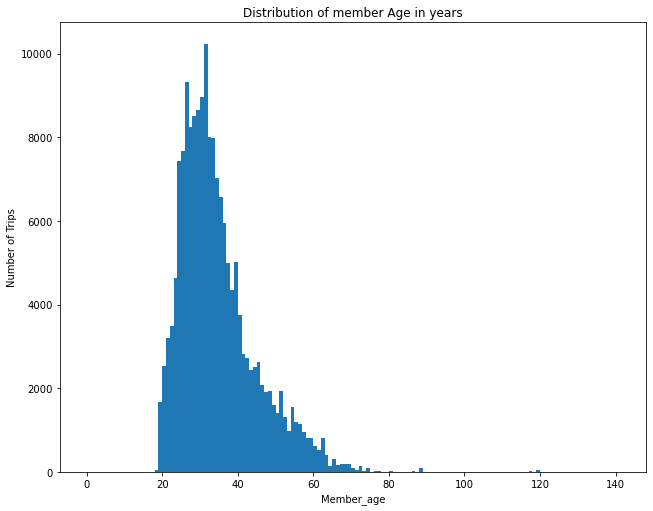

In [161]:
histplot_function(data = bike_df1, x = 'member_age', bins=bins)

In [162]:
bike_df1.member_age.describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

<AxesSubplot:xlabel='member_age'>

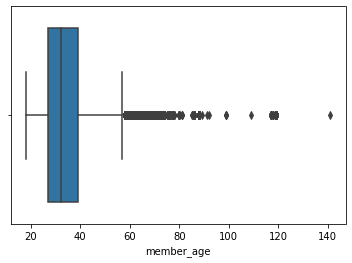

In [163]:
# Using a boxplot to visualize the member age in the dataset.
sns.boxplot(data = bike_df1, x='member_age')

From the analysis above, most of the users are aged between 27 and 39 years old.

### Gender distribution

Text(0, 0.5, 'Number of users')

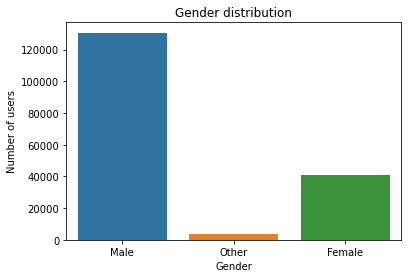

In [164]:
# Lets look at the gender distribution of members.
# Code
sns.countplot(data = bike_df1, x = 'member_gender')
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Number of users')

The chart above shows that over 120,000 males use the bike service while about 4000 females use the service. 

###  Number of Users per user type

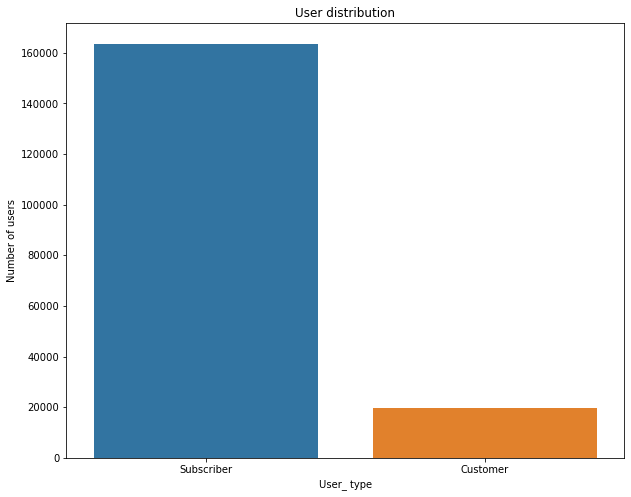

In [165]:
# Lets plot a bar chart to show the user type
plt.figure(figsize=[10,8])
user_category = bike_df1['user_type'].value_counts().index
sns.countplot(data = bike_df1, x = 'user_type', order = user_category)
plt.title('User distribution')
plt.xlabel('User_ type')
plt.ylabel('Number of users')
plt.show()

In [166]:
bike_df1.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

From the above, it can be seen that majority of the users are subscribers (163,544) while the remaining 19,868 users are customers.

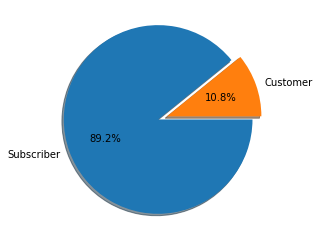

In [167]:
# using a pie chart to show the percentage of each user type.
user_category = bike_df1['user_type'].value_counts()
plt.pie(user_category, explode=(0, 0.1), labels = user_category.index, shadow = True, counterclock = False, autopct='%1.1f%%')
plt.axis('square')
plt.show()

From the pie chart above, 89.2% of users are subscribers, they use the bikes more than the customers, and 10.8% of users are customers. 

### Lets check the distribution of rides per day.

In [168]:
# First we create the labels
month_labels =['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
start_day_labels =['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

In [169]:
def histplot_function(data, x, bins, rwidth):
    bins= np.arange(0.5, 10 + 1, 1)
    plt.figure(figsize=[10, 8])
    plt.hist(data = bike_df1, x ='start_day', bins =bins, rwidth = 0.5)
    plt.xticks(np.arange(1, 7 + 1, 1), start_day_labels)
    plt.xlabel('start_day')
    plt.ylabel('No. of Users')
    plt.title('Distribution of rides per day')
    plt.show()

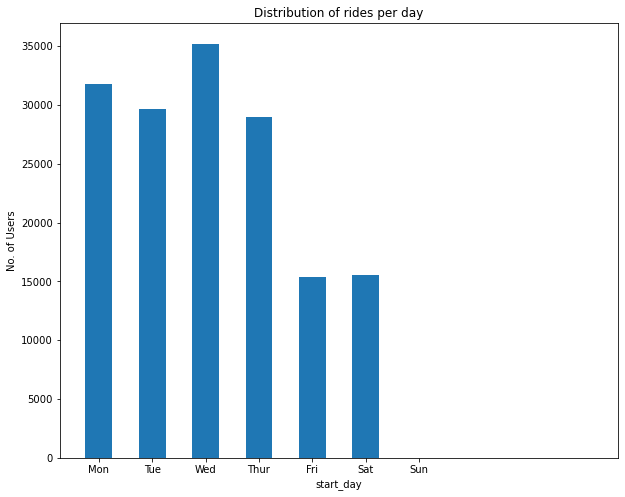

In [170]:
histplot_function(data = bike_df1, x ='start_day', bins =bins, rwidth = 0.5)

From the chart above, there is no bike usage on Sunday. Most bike usage occurs on Mondays and Wednesdays, this could be because users need the bike service to get to their work places, while the weekend (Friday, saturday) has the least usage. 

In [171]:
def histplot_function(data, x, bins, rwidth):
    bins= np.arange(0.5, 8 + 1, 1)
    plt.figure(figsize=[8, 5])
    plt.hist(data = bike_df1, x ='start_day', bins =bins, rwidth = 0.3)
    plt.xticks(np.arange(1, 7 + 1, 1), start_day_labels)
    plt.xlabel('start_day')
    plt.ylabel('Number of rides')
    plt.title('Distribution of rides per hour')
    plt.show()

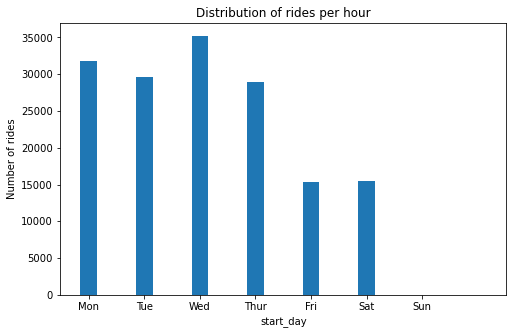

In [172]:
histplot_function(data = bike_df1, x ='start_day', bins =bins, rwidth = 0.3)

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of duration_minutes was not very clear at the first plot but after a log transformation, the distribution was clearer.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


There were no unusual distributions. The plots displayed as expected and clearly. 

## Bivariate Exploration

Bivariate exploration examines the relationship between 2 features. Can Age affect the duration of usage?
First, lets look at the relationship between user Age and trip duration.

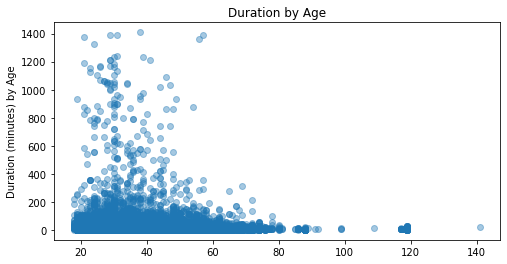

In [173]:
plt.figure(figsize=[8,4])
plt.scatter(data = bike_df1, x ='member_age', y = 'duration_minutes', alpha = 0.4)
plt.title('Duration by Age')
plt.ylabel('Duration (minutes) by Age')
plt.show()

From the above chart, users between age 20 and 50 ride for higher durations than other users. Users from 60 years of age rode for much lesser durations.

Lets look at the trip duration by gender. Which gender uses the bike for the longest minutes?

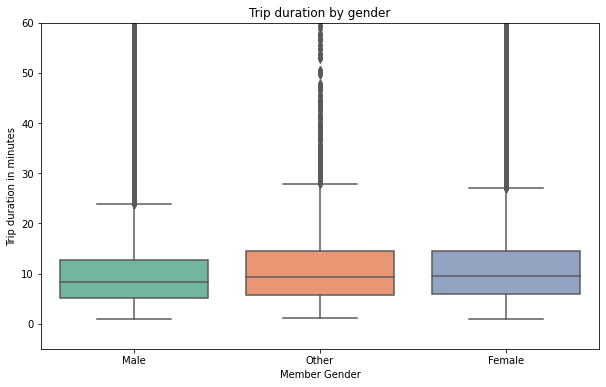

In [174]:
plt.figure(figsize =[10,6])
sns.boxplot(x = 'member_gender', y='duration_minutes', data = bike_df1, palette='Set2')
plt.ylim(-5, 60)
plt.title('Trip duration by gender')
plt.xlabel('Member Gender')
plt.ylabel('Trip duration in minutes')
plt.show()

I reduced the y axis(duration_minutes) to 60 minutes so we can have a better view of the plot. the plot shows that the female and other gender have trip duration that is slightly higher than the male gender.

### Trip duration by user type
Lets look at the trip duration by user_type. Which user type uses the bike for the longest minutes?

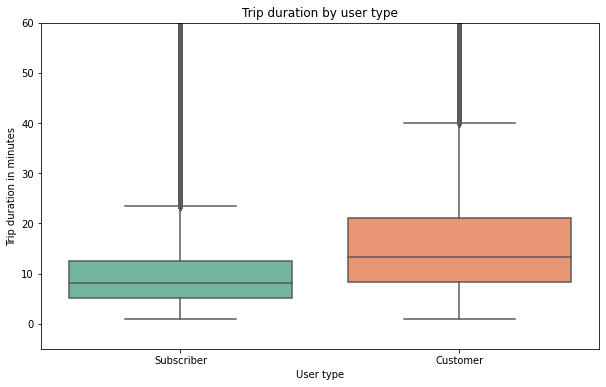

In [175]:
plt.figure(figsize =[10,6])
sns.boxplot(x = 'user_type', y='duration_minutes', data = bike_df1, palette='Set2', order = ['Subscriber', 'Customer'])
plt.ylim(-5, 60)
plt.title('Trip duration by user type')
plt.xlabel('User type')
plt.ylabel('Trip duration in minutes')
plt.show()

From the above plot, we can see that the customers use the bike for longer duration than the subscribers.

In [176]:
subscriber=bike_df1['user_type']=='Subscriber'
customer = bike_df1['user_type']=='Customer'

In [177]:
bike_df1[subscriber].duration_minutes.mean()

10.671061304603203

In [178]:
bike_df1[customer].duration_minutes.mean()

23.87441698543723

The above analysis shows that the subscribers use the bike ride for an average of 10 minutes while the customers use the bike ride for an average of 23 minutes.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

When looking at the relationship between Age and Trip duration, I observed that the users aged between 20 and 50 used the bikes for longer duration than the older users. From the relationship between gender and trip duration, I observed that female gender use the bike ride for a higher duration than the male gender. Looking at duration based on user type, it can be observed that the customers use the bike longer than the subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It was a bit surprising to notice that the female gender used the bike for longer duration that the male gender. I also observed that users that use the bike once in a while(customers) tend to use the bike for longer durations than subscibers whom I thought would use the bike for longer distances.

## Multivariate Exploration

I would like to investigate which age group has more users in each of the user type. To achieve this, I will divide member_age into 4 age groups namely teenagers, youths and adults and Retirees

In [179]:
# Age groupings
bike_df1['age_group']= bike_df1['member_age'].apply(lambda x: 'Teenagers' if 13<x<=19
else 'Youth' if 19<x<=30 
else 'Adult' if 30<x<=50 
else 'Senior Adult' if 50<x 
else x)

In [180]:
# Lets have the value counts of the age group.
bike_df1.age_group.value_counts()

Adult           85936
Youth           72643
Senior Adult    14856
Teenagers        1712
Name: age_group, dtype: int64

The above analysis shows that the bike service had fewer teenagers (age group between 13 and 19) and more of adults (age group between 30 and 50)


Lets look at the age group based on the user type.

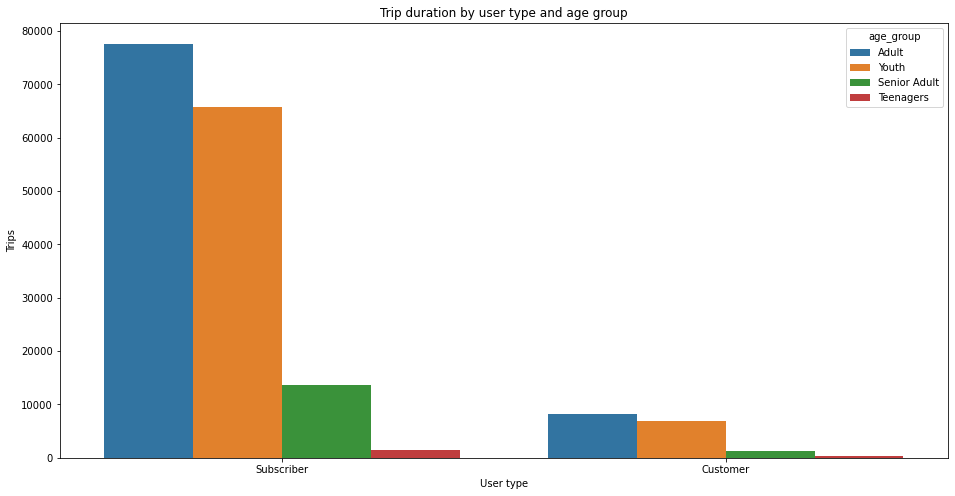

In [181]:
plt.figure(figsize=[35,8])
plt.subplot(1, 2, 1)
age_group_chart = sns.countplot(data=bike_df1, x = 'user_type', hue ='age_group', order = bike_df1.user_type.value_counts().index)
age_group_chart.set_xlabel('User type')
age_group_chart.set_title('Trip duration by user type and age group')
age_group_chart.set_ylabel('Trips');


From the above chart it can be observed that adults users are the most users in both user group while teenagers are the least users in both user groups

#### Lets look at the number of  rides in each hour of the day for user types and age groups.

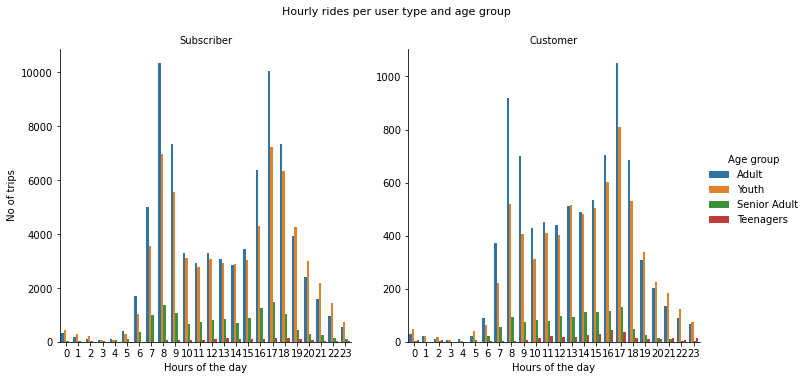

In [182]:
hourly_age_group = sns.catplot(data = bike_df1, x = 'start_hour', col = 'user_type', col_order=['Subscriber', 'Customer'], hue = 'age_group', kind = 'count', sharey = False)
hourly_age_group.set_axis_labels("Hours of the day", " No of trips")
hourly_age_group._legend.set_title("Age group")
hourly_age_group.set_titles("{col_name}")
hourly_age_group.fig.suptitle('Hourly rides per user type and age group', y = 1.05, fontsize = 11);

From the chart above, we can see that the trip gets higher from 8am which is when workers need to get to work with adult age group having the highest number of trips, there is also a peak at 5pm which is when workers return from work. It can also be observed thatfor both type of users (customers and subscribers) the adult age group still takes the highest rides. it can also be noticed that from 7pm the numbe of rides for youths gets higher than other age group for both customers and subscribers.

I would like to explore the relationship between duration in seconds, user type and member gender.

<Figure size 1440x1080 with 0 Axes>

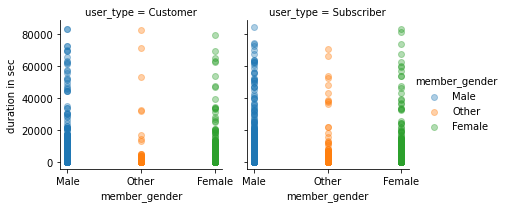

In [183]:
plt.figure(figsize =[20, 15])
chart1 = sns.FacetGrid(data= bike_df1, col = 'user_type', hue = 'member_gender')
chart1.map_dataframe(plt.scatter, 'member_gender', 'duration_sec', alpha = 0.36)
chart1.set_axis_labels('member_gender', 'duration in sec')
chart1.add_legend()
plt.show()

From the plot above, the Customer and subscriber user types seem to behave the same way in their trip duration, apart from the other gender which has a slight difference in user type and trip duration. 

lets plot a barplot to show the relationship between duration in seconds, user type and bike for all share.

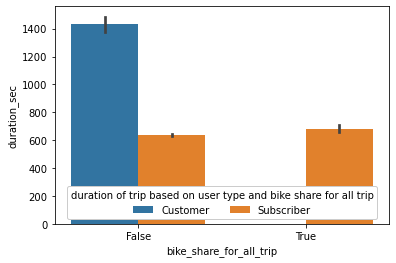

In [184]:
ax = sns.barplot(data = bike_df1, x = 'bike_share_for_all_trip', y='duration_sec', hue='user_type')
ax.legend(loc =8, ncol =3, framealpha =1, title ='duration of trip based on user type and bike share for all trip')

From the chart above, we see that more subscribers enrolled in the bike share for all program than customers.